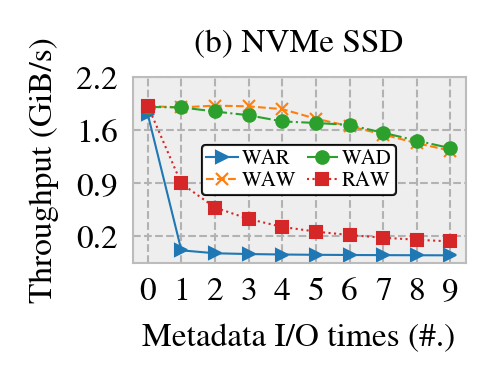

In [4]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH / 2), cm_to_inch(3.5)))

line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-."]
title = [ "(b) NVMe SSD" ]
ops = ["WAR", "WAW_INPLACE", "WAD", "RAW"]
meta_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)
lines = []
cmap = "tab10"
for idx, op in enumerate(ops):
    line, = plt.plot(meta_times, df[(df['pattern'] == op)]['bandwidth(GiB/s)'], color=plt.get_cmap(cmap)(idx), markerfacecolor=plt.get_cmap(cmap)(idx), linewidth=line_width,label=op, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx])
    
    lines.append(line)
ax = fig.gca()
lw = 0.5
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(lw)

plt.xticks(meta_times, [meta_time - 1 for meta_time in meta_times], fontsize=8)
plt.tick_params(bottom=False, top=False, left=False, right=False)
# if op_idx == 0:
#     plt.ylabel('Throughput (GiB/s)', fontsize=8)
# if op_idx == 0 or op_idx == 1:
#     plt.yticks(np.linspace(0.25, 2.25, 4), fontsize=8)
# else:
#     plt.yticks(np.linspace(1, 6.6, 4), fontsize=8)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
# subfig.text(0.5, -0.3, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
plt.xlabel("Metadata I/O times (#.)", fontsize=8) 
plt.title(title[0], fontsize=8, loc='center')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)

plt.ylabel('Throughput (GiB/s)', fontsize=8)
plt.yticks(np.linspace(0.25, 2.25, 4), fontsize=8)
    
    
ops = pd.Series(ops)
ops.replace("WAW_INPLACE", "WAW", inplace=True)
ops.replace("RAW_NT_STORE", "RAW-nt", inplace=True)
ops.replace("RAW_FLUSH", "RAW-flush", inplace=True)

for ax_id, ax in enumerate(fig.axes):
    if ax_id == 0:
        _steps = [4, 0]
        locs = ['center']

        for _step_idx, _step in enumerate(_steps):
            if _step == 0:
                continue
            loc = locs[_step_idx]
            _start = sum(_steps[:_step_idx])
            _end = _start + _step

            leg = plt.legend(lines[_start : _end], ops[_start : _end], loc=loc, bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=2, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
        
            frame = leg.get_frame()
            frame.set_facecolor('white')
            frame.set_edgecolor('black')

            plt.gca().add_artist(leg)



# fig.legend(lines, fss, loc='center', bbox_to_anchor=(0.5, 1.01), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
plt.tight_layout()
# gs0.tight_layout(fig)
plt.savefig("./FIG-IO-Pipeline-Study.pdf", bbox_inches='tight', pad_inches=0)